In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
import colorsys

# https://matplotlib.org/stable/api/animation_api.html
# https://petercbsmith.github.io/marker-tutorial.html

In [2]:
def heart_p(x):
    y = x**(2/3) + np.sqrt(1-x**2)
    return y

def heart_m(x):
    y = x**(2/3) - np.sqrt(1-x**2)
    return y

In [3]:
def randompm1():
    return random.random()*2-1

def random_angle():
    return random.random()*360-180

def random_filler(): # -20 20
    return random.random()*40-20

In [4]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [102]:
[x for x in range(0,int(10/2))]

[0, 1, 2, 3, 4]

In [118]:
def filler(t):
    # t = np.array([random_angle() for x in range(0,1000)])
    
    rand = np.array([random.uniform(0,1) for x in range(0, len(t))])
    '''    
    rand = np.array([random.gauss(mu=0.5, sigma=0.2) for x in range(0, int(len(t)))]) 
    '''


    x = 16 * np.sin(t)**3
    y = (13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t))
    rho, phi = cart2pol(x, y)
    fx, fy = pol2cart(rho * rand, phi)
    return fx, fy 

In [6]:
t = np.array([random_angle() for x in range(0,1000)])

In [7]:
x = 16 * np.sin(t)**3
y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)

In [126]:
def rand_color():
    hlsval = ((random.random() * 60 + 300)/360, 0.5, 1)
    rgbval=colorsys.hls_to_rgb(hlsval[0],hlsval[1],hlsval[2])
    return rgbval

def rand_color_2():
    hlsval = (1, random.random()*0.3+0.2, 1)
    rgbval=colorsys.hls_to_rgb(hlsval[0],hlsval[1],hlsval[2])
    return rgbval

In [39]:
colorsys.hls_to_rgb(1, 0.5, 1)

(1.0, 0.0, 0.0)

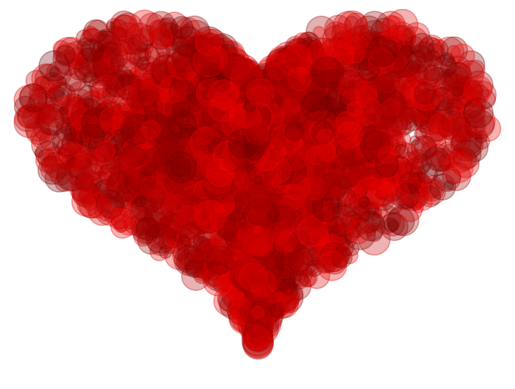

In [130]:
fig, ax = plt.subplots()
t = np.array([random_angle() for x in range(0,1000)])
x = 16 * np.sin(t)**3
y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
# scat = ax.scatter(x,y, color='r')

ft = np.array([random_angle() for x in range(0,5000)])
fx, fy = filler(ft)
fill_scat = ax.scatter(fx,fy, color=[rand_color_2() for x in range(len(ft))], s=[random.random()*500+20 for x in range(len(ft))], alpha = 0.3) #, edgecolor='none'

ax.set(xlim=[-17, 17], ylim=[-20, 13], xlabel='', ylabel='')
plt.axis('off')


'''

def update(frame):
    # for each frame, update the data stored on each artist.
    X = x[:frame]
    Y = y[:frame]
    # update the scatter plot:
    data = np.stack([X, Y]).T
    scat.set_offsets(data)
    return scat

ani = animation.FuncAnimation(fig=fig, func=update, frames=1000, interval=1)
'''



def update_filler(frame):
    # for each frame, update the data stored on each artist.
    fX = fx[:frame]
    fY = fy[:frame]
    # update the scatter plot:
    data = np.stack([fX, fY]).T
    fill_scat.set_offsets(data)
    return fill_scat



ani = animation.FuncAnimation(fig=fig, func=update_filler, frames=1000, interval=1)
plt.show()
ani.save(filename="./heart_5000_light.mp4", writer="ffmpeg")